In [1]:
# check for gpu
!nvidia-smi -L

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
# Download Bitcoin historical data from GitHub
# Note: you'll need to select "Raw" to download the data in the correct format
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-08-14 11:57:29--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2023-08-14 11:57:29 (6.57 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [3]:
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                 parse_dates=['Date'],
                 index_col=['Date'])
df.head(5)

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [4]:
df.tail(5)

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [5]:
len(df)

2787

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [7]:
df.describe()

,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
count,2787.000000,2787.000000,2787.000000,2787.000000
mean,6529.845141,6513.579485,6710.061683,6302.417386
std,10887.847444,10863.800772,11206.779756,10475.811252
min,108.584830,108.584830,118.675000,83.328330
25%,460.087500,459.400500,469.720995,450.818830
50%,2780.182500,2772.367500,2874.696250,2696.457500
75%,8506.923720,8496.887593,8763.291985,8221.060570
max,63346.789035,63562.673545,64801.787870,62094.632914


In [8]:
#Only want closing price for each day
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)': 'Prices'})
bitcoin_prices.head(5)

,Prices
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [9]:
bitcoin_prices.tail(5)

,Prices
Date,
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255
2021-05-17,45604.615754
2021-05-18,43144.471291


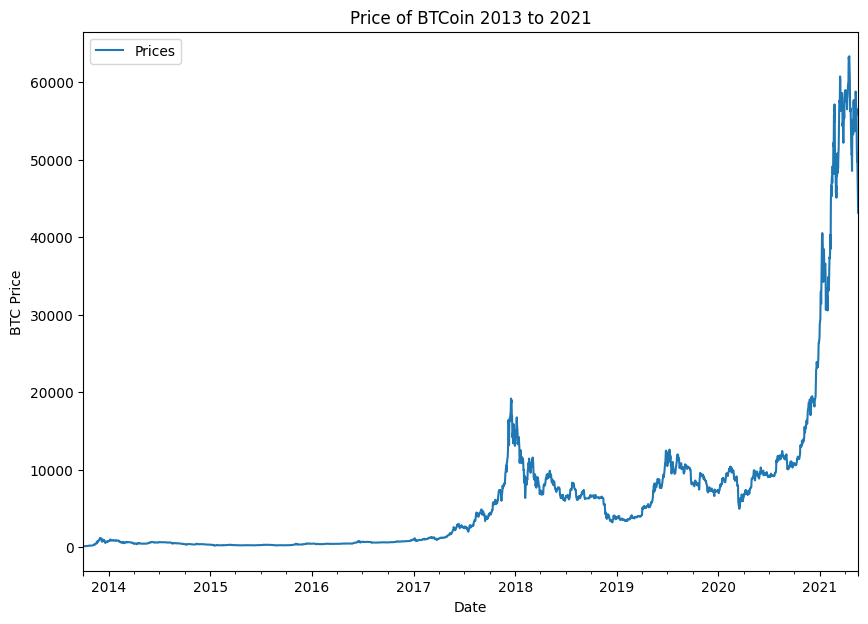

In [10]:
# plot the bitcoin_prices
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel('BTC Price')
plt.title('Price of BTCoin 2013 to 2021')
plt.legend()

In [11]:
# Importing and Formatting data using python
import csv
from datetime import datetime

timesteps= []
btc_prices = []

with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=',')
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
    btc_prices.append(float(line[2]))

#view first 10 of each
timesteps[:10], btc_prices[:10]


([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

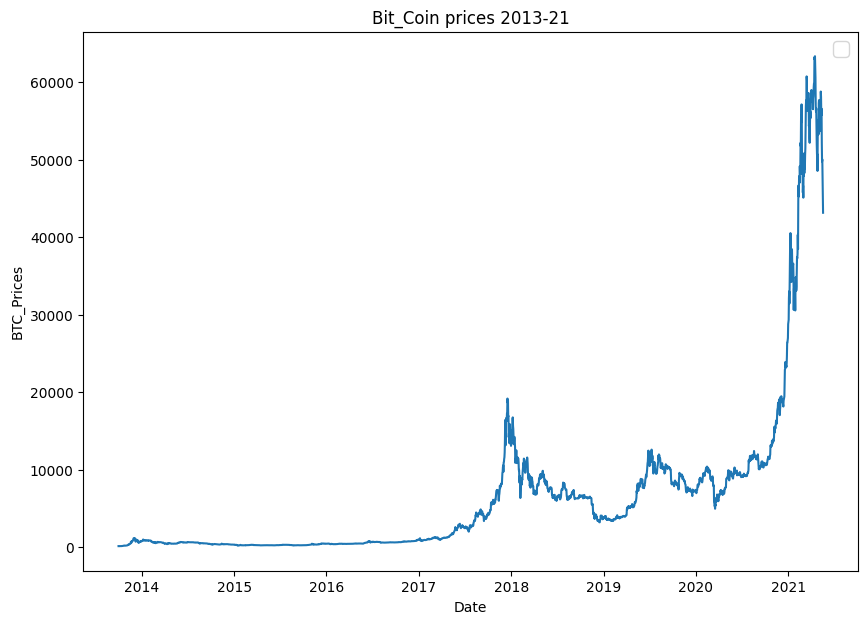

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_prices)
plt.xlabel('Date')
plt.ylabel('BTC_Prices')
plt.title('Bit_Coin prices 2013-21')
plt.legend(fontsize=14)

In [13]:
btc_prices

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116,
 125.27966,
 125.9275,
 126.38333,
 135.24199,
 133.20333,
 142.76333,
 137.92333,
 142.95166,
 152.55183,
 160.33883,
 164.31499,
 177.63333,
 188.29716,
 200.70166,
 180.355,
 175.03166,
 177.6965,
 187.15983,
 192.75666,
 197.4,
 196.02499,
 198.04883,
 198.93233,
 200.543,
 210.3075,
 225.02,
 248.25333,
 262.32666,
 294.48699,
 331.10325,
 285.8875,
 304.97974,
 338.137,
 357.48,
 402.954,
 409.10375,
 420.21649,
 437.29725,
 510.6025,
 693.65,
 531.54249,
 574.71599,
 681.33,
 774.18,
 746.19374,
 768.8475,
 789.36475,
 893.1815,
 934.355,
 1068.363,
 1154.92593,
 1099.51926,
 1019.78966,
 1028.845,
 1071.2848,
 1139.33083,
 1004.61633,
 759.43041,
 689.81,
 841.83966,
 916.77599,
 967.42866,
 866.29003,
 911.23204,
 889.81946,
 848.9975,
 868.95316,
 653.80483,
 654.06266,
 553.69166,
 693.05883,
 649.38965,
 595.95883,
 647.68316,
 671.58116,
 659.84333,
 702.00083,
 

Creatining train and test sets for time series data.

In [14]:
from sqlalchemy import bitwise_not
#Turn our dataframe index and column into numpy arrays
timesteps=bitcoin_prices.index.to_numpy()
prices=bitcoin_prices.Prices.to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [15]:
#Wrong way to make train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

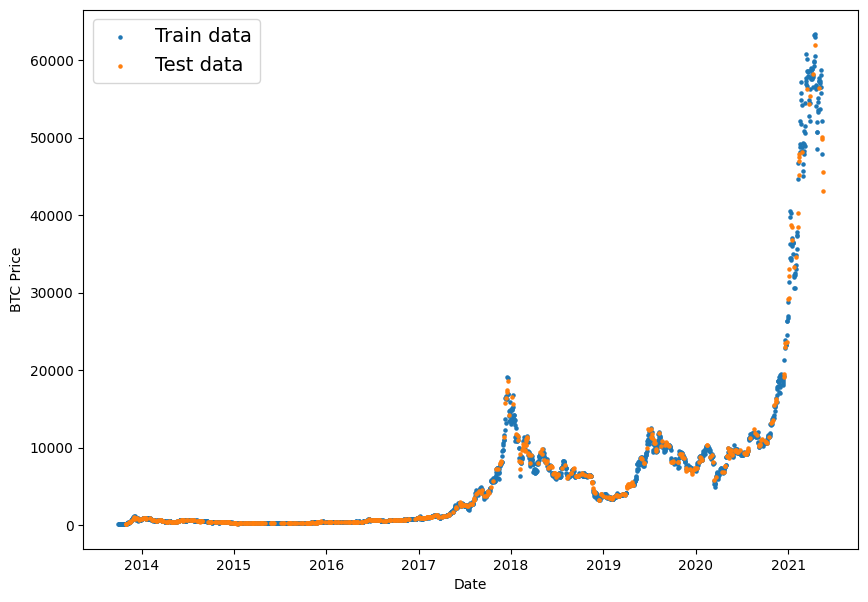

In [16]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [17]:
# Creating train and test spilts in the right way
split_size = int(0.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

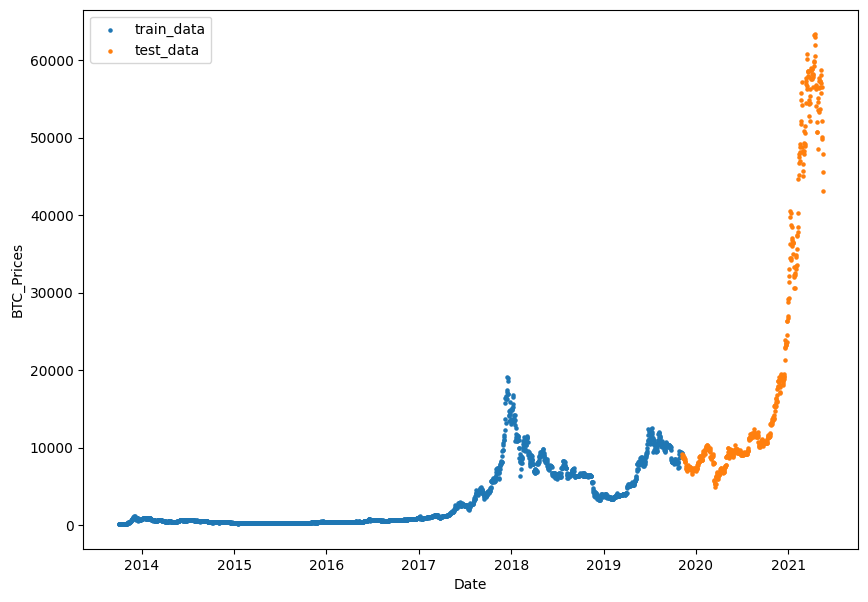

In [18]:
# Plotting
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label='train_data')
plt.scatter(X_test, y_test, s=5, label='test_data')
plt.xlabel('Date')
plt.ylabel('BTC_Prices')
plt.legend()
plt.show()

In [19]:
#Create a function to plot time series data
import matplotlib.pyplot as plt

def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  '''
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  Parameters
  ----------
  timesteps: array of timesteps.
  values: array of values across time.
  format: style of plot. default='.'.
  start: whare to start the plot.
  end: where to end the plot.
  label: label to show on the plot values.

  '''

  #plot the series.
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  #plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel('Time')
  plt.ylabel('BTC_Prices')
  plt.title('BitCoin prices 2013-21')
  if label:
    plt.legend()
  plt.grid(True)

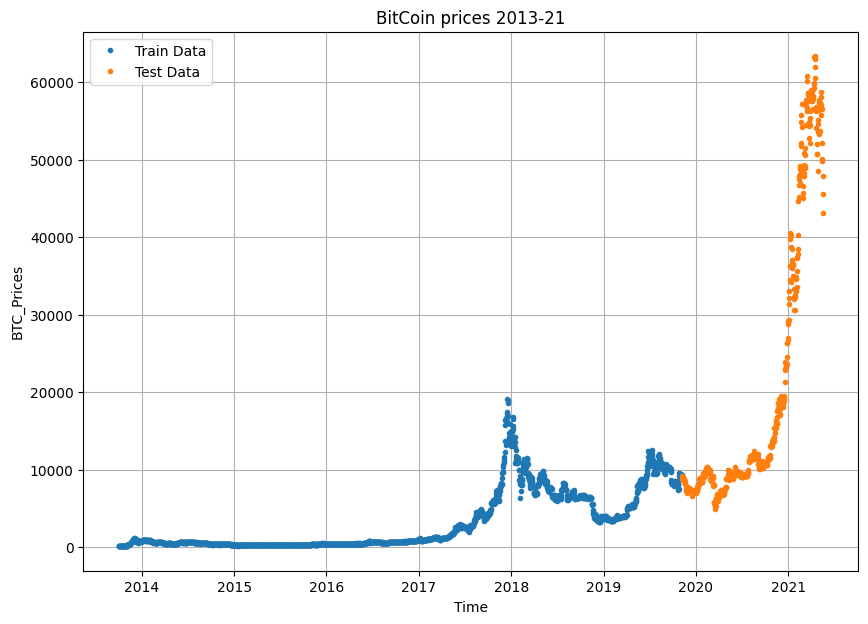

In [20]:
# Try to plotting the function
plt.figure(figsize=(10,7))
plot_time_series(X_train, y_train, label='Train Data')
plot_time_series(X_test, y_test, label='Test Data')

Naive Forecast

In [21]:
# creating naive forecasting for the model
naive_forecast = y_test[:-1]
naive_forecast[:10]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
       8500.64355816, 8469.2608989 ])

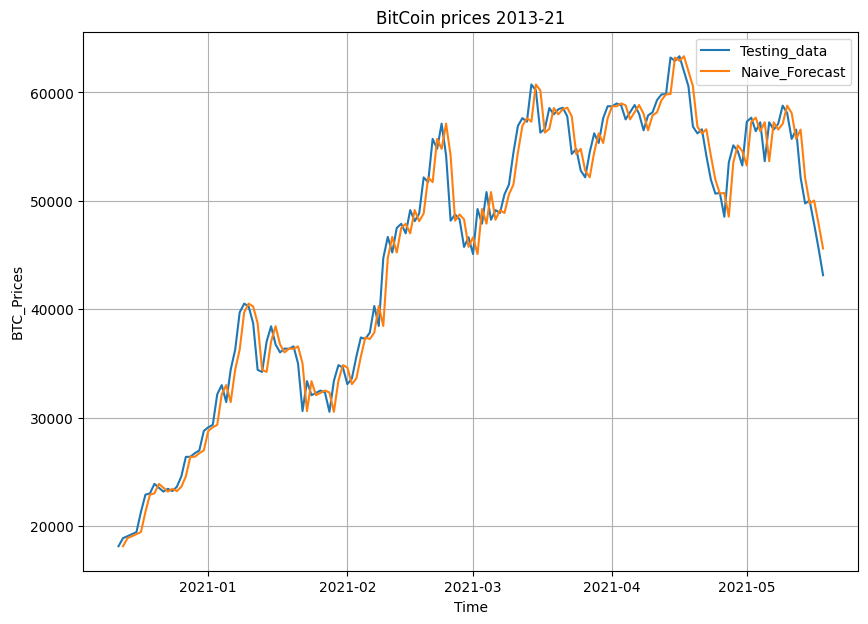

In [22]:
#plot prediction for naive forecast
plt.figure(figsize=(10,7))
offset=400
plot_time_series(X_test, y_test, format='-', start=offset, label='Testing_data')
plot_time_series(X_test[1:], naive_forecast, format='-', start=offset, label='Naive_Forecast')
plt.grid(True)

In [23]:
import tensorflow as tf

In [24]:
# MASE
def mean_absolute_scaled_error(y_true, y_pred):
  '''
  Implement MASE (assuming no seasonality of data)
  '''

  mae = tf.reduce_mean(tf.abs(y_true - y_pred))
  # find MAE of naive forecast
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

  return mae / mae_naive_no_season

In [25]:
from numpy import float32
def evaluate_preds(y_true, y_pred):
  # make sure float32
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  #calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase=mean_absolute_scaled_error(y_true, y_pred)

  return {
      'mae' : mae.numpy(),
      'mse': mse.numpy(),
      'rmse' : rmse.numpy(),
      'mape' : mape.numpy(),
      'mase' : mase.numpy()
  }

In [26]:
# test our function on the naive forecast
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [27]:
#find the average price of bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

20056.632963737226

In [28]:
HORIZON=1
WINDOW_SIZE=7


In [29]:
def get_labelled_windows(x, horizon=1):
  '''
  Creates labels for windowes dataset.

  '''

  return x[:, :-horizon], x[:, -horizon:]

In [30]:
# testout the get_global labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f'test_window: {test_window} test_label: {test_label}')

test_window: [[1 2 3 4 5 6 7]] test_label: [[8]]


In [31]:
# Create function to view NumPy arrays as windows
import numpy as np

def make_windows(x, window_size=7, horizon=1):
  '''
  Turns a 1D array into a 2D array sequential windows of window_size.

  '''
  # Creart a window of specific window_size
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  print(f'window_steps: {window_step}')
  # Ctreate 2D array of multiple window_steps
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T
  print(f'window indexes: {window_indexes[:3]}')

  #Index on the target array
  windowed_array = x[window_indexes]

  # Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [32]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

window_steps: [[0 1 2 3 4 5 6 7]]
window indexes: [[0 1 2 3 4 5 6 7]
 [1 2 3 4 5 6 7 8]
 [2 3 4 5 6 7 8 9]]


(2780, 2780)

In [33]:
# View the first 3 windows/labels
for i in range(3):
  print(f'Windows: {full_windows[i]} -> Labels: {full_labels[i]}')

Windows: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Labels: [123.033]
Windows: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Labels: [124.049]
Windows: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Labels: [125.96116]


In [34]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


In [35]:
# Make train-test-splits
def make_train_test_spilts(windows, labels, test_splits=0.2):
  '''
  Splits matching pair's of windows and labels into train and test.
  '''
  split_size = int(len(windows) * (1-test_splits))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, train_labels, test_windows, test_labels

In [36]:
train_windows, train_labels, test_windows, test_labels = make_train_test_spilts(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [37]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [38]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

Model_1: Dense (Windows=7, Horizon=1)

In [42]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear',name='output_layer')
], name='model_1_dense')

model_1.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

In [40]:
model_1.summary()

ValueError: ignored

In [44]:
history_1 = model_1.fit(train_windows,
                        train_labels,
                        epochs=100,
                        verbose=1,
                        batch_size=128,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_1.name)]
                        )

Epoch 1/100
 1/18 [>.............................] - ETA: 0s - loss: 117.3642 - mae: 117.3642

18/18 [==============================] - 1s 42ms/step - loss: 110.7352 - mae: 110.7352 - val_loss: 569.9899 - val_mae: 569.9899
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 83.3396 - mae: 83.3396

18/18 [==============================] - 0s 23ms/step - loss: 107.7288 - mae: 107.7288 - val_loss: 568.9929 - val_mae: 568.9929
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 106.6278 - mae: 106.6278 - val_loss: 570.2726 - val_mae: 570.2726
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 109.2761 - mae: 109.2761 - val_loss: 570.3861 - val_mae: 570.3861
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 108.4186 - mae: 108.4186 - val_loss: 587.8291 - val_mae: 587.8291
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 108.9646 - mae: 108.9646 - val_loss: 602.6862 - val_mae: 602.6862
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 108.2976 - mae: 108.2976 - val_loss: 647.8719 - val_mae: 647.8719
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 105.5491 - mae: 105.5491

18/18 [==============================] - 0s 23ms/step - loss: 108.2251 - mae: 108.2251 - val_loss: 568.2906 - val_mae: 568.2906
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 107.4312 - mae: 107.4312 - val_loss: 569.3253 - val_mae: 569.3253
Epoch 10/100
18/18 [==============================] - 0s 3ms/step - loss: 113.5434 - mae: 113.5434 - val_loss: 623.5092 - val_mae: 623.5092
Epoch 11/100
18/18 [==============================] - 0s 2ms/step - loss: 110.8772 - mae: 110.8772 - val_loss: 605.8377 - val_mae: 605.8377
Epoch 12/100
18/18 [==============================] - 0s 2ms/step - loss: 111.0396 - mae: 111.0396 - val_loss: 606.4749 - val_mae: 606.4749
Epoch 13/100
18/18 [==============================] - 0s 3ms/step - loss: 119.3584 - mae: 119.3584 - val_loss: 616.0034 - val_mae: 616.0034
Epoch 14/100
18/18 [==============================] - 0s 3ms/step - loss: 116.8955 - mae: 116.8955 - val_loss: 649.1958 - val_mae: 649.1958
Epoch 15/100
18/18 [=============

18/18 [==============================] - 1s 40ms/step - loss: 106.0387 - mae: 106.0387 - val_loss: 567.9793 - val_mae: 567.9793
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 101.0556 - mae: 101.0556

18/18 [==============================] - 0s 22ms/step - loss: 106.1261 - mae: 106.1261 - val_loss: 567.2470 - val_mae: 567.2470
Epoch 27/100
18/18 [==============================] - 0s 2ms/step - loss: 105.6280 - mae: 105.6280 - val_loss: 578.4538 - val_mae: 578.4538
Epoch 28/100
18/18 [==============================] - 0s 2ms/step - loss: 105.8570 - mae: 105.8570 - val_loss: 576.2426 - val_mae: 576.2426
Epoch 29/100
18/18 [==============================] - 0s 2ms/step - loss: 106.1612 - mae: 106.1612 - val_loss: 589.6244 - val_mae: 589.6244
Epoch 30/100
18/18 [==============================] - 0s 3ms/step - loss: 113.0669 - mae: 113.0669 - val_loss: 597.8376 - val_mae: 597.8376
Epoch 31/100
18/18 [==============================] - 0s 4ms/step - loss: 113.9453 - mae: 113.9453 - val_loss: 805.9101 - val_mae: 805.9101
Epoch 32/100
18/18 [==============================] - 0s 3ms/step - loss: 117.7709 - mae: 117.7709 - val_loss: 578.3980 - val_mae: 578.3980
Epoch 33/100
18/18 [============

18/18 [==============================] - 0s 22ms/step - loss: 109.8221 - mae: 109.8221 - val_loss: 566.9456 - val_mae: 566.9456
Epoch 38/100
18/18 [==============================] - 0s 4ms/step - loss: 108.0007 - mae: 108.0007 - val_loss: 573.9758 - val_mae: 573.9758
Epoch 39/100
18/18 [==============================] - 0s 3ms/step - loss: 107.9358 - mae: 107.9358 - val_loss: 605.5270 - val_mae: 605.5270
Epoch 40/100
18/18 [==============================] - 0s 2ms/step - loss: 107.0534 - mae: 107.0534 - val_loss: 579.9151 - val_mae: 579.9151
Epoch 41/100
18/18 [==============================] - 0s 3ms/step - loss: 106.6942 - mae: 106.6942 - val_loss: 590.7719 - val_mae: 590.7719
Epoch 42/100
18/18 [==============================] - 0s 2ms/step - loss: 110.5389 - mae: 110.5389 - val_loss: 583.2148 - val_mae: 583.2148
Epoch 43/100
18/18 [==============================] - 0s 3ms/step - loss: 110.6378 - mae: 110.6378 - val_loss: 603.2192 - val_mae: 603.2192
Epoch 44/100
18/18 [============

18/18 [==============================] - 0s 24ms/step - loss: 107.7734 - mae: 107.7734 - val_loss: 565.4329 - val_mae: 565.4329
Epoch 47/100
18/18 [==============================] - 0s 3ms/step - loss: 108.0674 - mae: 108.0674 - val_loss: 617.3621 - val_mae: 617.3621
Epoch 48/100
 1/18 [>.............................] - ETA: 0s - loss: 104.8559 - mae: 104.8559

18/18 [==============================] - 0s 23ms/step - loss: 106.1706 - mae: 106.1706 - val_loss: 564.8929 - val_mae: 564.8929
Epoch 49/100
18/18 [==============================] - 0s 3ms/step - loss: 107.8506 - mae: 107.8506 - val_loss: 607.4091 - val_mae: 607.4091
Epoch 50/100
18/18 [==============================] - 0s 2ms/step - loss: 112.4753 - mae: 112.4753 - val_loss: 566.0890 - val_mae: 566.0890
Epoch 51/100
18/18 [==============================] - 0s 2ms/step - loss: 106.6591 - mae: 106.6591 - val_loss: 565.0142 - val_mae: 565.0142
Epoch 52/100
18/18 [==============================] - 0s 2ms/step - loss: 108.1665 - mae: 108.1665 - val_loss: 572.1711 - val_mae: 572.1711
Epoch 53/100
18/18 [==============================] - 0s 2ms/step - loss: 107.4186 - mae: 107.4186 - val_loss: 596.7820 - val_mae: 596.7820
Epoch 54/100
 1/18 [>.............................] - ETA: 0s - loss: 101.2692 - mae: 101.2692

18/18 [==============================] - 0s 22ms/step - loss: 108.4859 - mae: 108.4859 - val_loss: 564.8000 - val_mae: 564.8000
Epoch 55/100
18/18 [==============================] - 0s 2ms/step - loss: 110.1592 - mae: 110.1592 - val_loss: 565.0334 - val_mae: 565.0334
Epoch 56/100
18/18 [==============================] - 0s 2ms/step - loss: 106.3511 - mae: 106.3511 - val_loss: 737.0524 - val_mae: 737.0524
Epoch 57/100
18/18 [==============================] - 0s 2ms/step - loss: 123.5299 - mae: 123.5299 - val_loss: 679.5857 - val_mae: 679.5857
Epoch 58/100
18/18 [==============================] - 0s 3ms/step - loss: 113.4859 - mae: 113.4859 - val_loss: 630.6462 - val_mae: 630.6462
Epoch 59/100
18/18 [==============================] - 0s 2ms/step - loss: 107.1087 - mae: 107.1087 - val_loss: 590.2563 - val_mae: 590.2563
Epoch 60/100
18/18 [==============================] - 0s 2ms/step - loss: 109.6365 - mae: 109.6365 - val_loss: 612.1351 - val_mae: 612.1351
Epoch 61/100
18/18 [============

18/18 [==============================] - 0s 24ms/step - loss: 105.7712 - mae: 105.7712 - val_loss: 564.6254 - val_mae: 564.6254
Epoch 87/100
18/18 [==============================] - 0s 2ms/step - loss: 105.2696 - mae: 105.2696 - val_loss: 591.7901 - val_mae: 591.7901
Epoch 88/100
18/18 [==============================] - 0s 3ms/step - loss: 106.8511 - mae: 106.8511 - val_loss: 570.5344 - val_mae: 570.5344
Epoch 89/100
18/18 [==============================] - 0s 3ms/step - loss: 106.3887 - mae: 106.3887 - val_loss: 567.6341 - val_mae: 567.6341
Epoch 90/100
18/18 [==============================] - 0s 2ms/step - loss: 104.9305 - mae: 104.9305 - val_loss: 618.0870 - val_mae: 618.0870
Epoch 91/100
18/18 [==============================] - 0s 3ms/step - loss: 110.4230 - mae: 110.4230 - val_loss: 628.8860 - val_mae: 628.8860
Epoch 92/100
18/18 [==============================] - 0s 3ms/step - loss: 106.7685 - mae: 106.7685 - val_loss: 576.6848 - val_mae: 576.6848
Epoch 93/100
18/18 [============

In [45]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 564.6254 - mae: 564.6254


[564.6253662109375, 564.6253662109375]

In [46]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [47]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8843.192 , 8785.972 , 9070.355 , 8780.023 , 8745.103 , 8769.676 ,
        8676.485 , 8529.749 , 8473.021 , 8544.0205], dtype=float32)>)

In [48]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results


{'mae': 564.62537,
 'mse': 1151171.1,
 'rmse': 1072.9264,
 'mape': 2.505764,
 'mase': 0.9918904}

In [54]:
len(test_labels[:, 0])
test_labels[:, 0]

array([ 8798.04205463,  9081.18687849,  8711.53433917,  8760.89271814,
        8749.52059102,  8656.97092235,  8500.64355816,  8469.2608989 ,
        8537.33965197,  8205.80636599,  8118.4885358 ,  8074.84317361,
        7612.7405735 ,  7262.11053495,  7303.40575852,  7041.73293642,
        7211.86180875,  7141.06944869,  7523.4806726 ,  7390.20746923,
        7729.26593894,  7542.23560864,  7381.96300782,  7333.43293049,
        7315.36776456,  7213.73376172,  7398.78704961,  7511.88058312,
        7532.12351309,  7550.23919987,  7333.09604316,  7239.76257544,
        7198.06667705,  7190.27236926,  7238.87432299,  7087.02498535,
        7112.73147612,  6883.49639377,  6584.02884335,  7424.01540023,
        7147.56832379,  7139.93337053,  7286.33508116,  7236.98620461,
        7166.17237853,  7235.6266505 ,  7212.80939522,  7183.70653603,
        7227.29371168,  7311.56064392,  7385.46484791,  7251.27679432,
        7179.95781929,  7174.74401195,  6955.48757967,  7291.21950532,
      

In [49]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

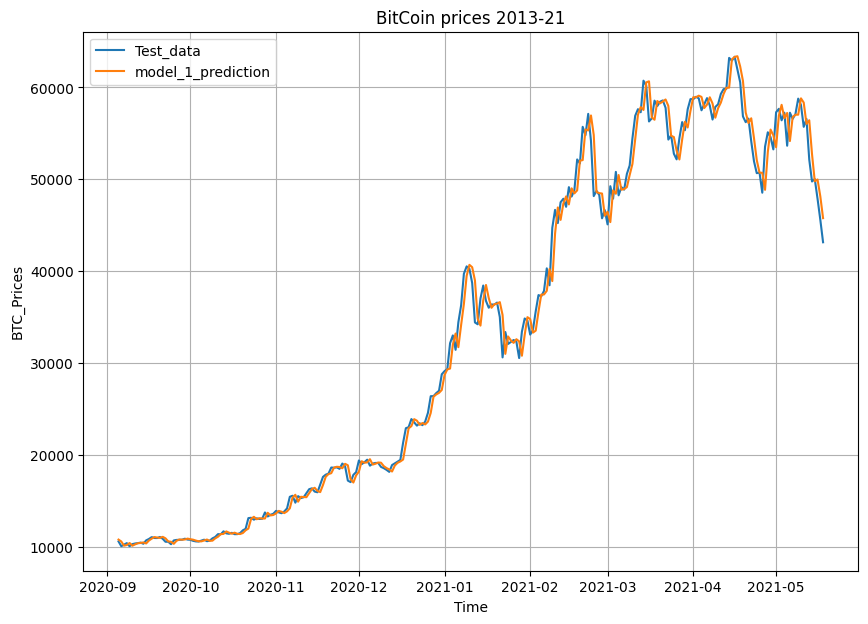

In [56]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format = '-', label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_prediction")

Model_2: Dense (Windows=30, Horizon=7)

In [58]:
WINDOWS=30
HORIZON=7

In [59]:
full_windows, full_labels = make_windows(prices, WINDOWS, HORIZON)
len(full_windows), len(full_labels)

window_steps: [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32 33 34 35 36]]
window indexes: [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32 33 34 35 36]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
  25 26 27 28 29 30 31 32 33 34 35 36 37]
 [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
  26 27 28 29 30 31 32 33 34 35 36 37 38]]


(2751, 2751)

In [60]:
train_windows, train_labels, test_windows, test_labels = make_train_test_spilts(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2200, 2200, 551, 551)

In [62]:
# Creating model_2
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_2')

model_2.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

history_2 = model_2.fit(train_windows,
                        train_labels,
                        epochs=100,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name='model_2')])

Epoch 1/100
67/69 [============================>.] - ETA: 0s - loss: 776.1326 - mae: 776.1326  

69/69 [==============================] - 1s 9ms/step - loss: 766.7310 - mae: 766.7310 - val_loss: 1869.3687 - val_mae: 1869.3687
Epoch 2/100
50/69 [====================>.........] - ETA: 0s - loss: 347.4669 - mae: 347.4669

69/69 [==============================] - 0s 7ms/step - loss: 353.6809 - mae: 353.6809 - val_loss: 1841.1123 - val_mae: 1841.1123
Epoch 3/100
52/69 [=====================>........] - ETA: 0s - loss: 327.7593 - mae: 327.7593

69/69 [==============================] - 0s 6ms/step - loss: 321.7823 - mae: 321.7823 - val_loss: 1742.1353 - val_mae: 1742.1353
Epoch 4/100
46/69 [===================>..........] - ETA: 0s - loss: 303.0366 - mae: 303.0366

69/69 [==============================] - 1s 7ms/step - loss: 298.0352 - mae: 298.0352 - val_loss: 1474.2764 - val_mae: 1474.2764
Epoch 5/100
69/69 [==============================] - 0s 2ms/step - loss: 283.5241 - mae: 283.5241 - val_loss: 1799.9130 - val_mae: 1799.9130
Epoch 6/100
69/69 [==============================] - 0s 2ms/step - loss: 272.2679 - mae: 272.2679 - val_loss: 1574.0529 - val_mae: 1574.0529
Epoch 7/100
44/69 [==================>...........] - ETA: 0s - loss: 278.4274 - mae: 278.4274

69/69 [==============================] - 0s 7ms/step - loss: 282.4957 - mae: 282.4957 - val_loss: 1438.4520 - val_mae: 1438.4520
Epoch 8/100
49/69 [====================>.........] - ETA: 0s - loss: 269.7233 - mae: 269.7233

69/69 [==============================] - 0s 7ms/step - loss: 265.9023 - mae: 265.9023 - val_loss: 1369.0591 - val_mae: 1369.0591
Epoch 9/100
69/69 [==============================] - 0s 2ms/step - loss: 259.7339 - mae: 259.7339 - val_loss: 1438.2083 - val_mae: 1438.2083
Epoch 10/100
69/69 [==============================] - 0s 2ms/step - loss: 259.4882 - mae: 259.4882 - val_loss: 1382.4117 - val_mae: 1382.4117
Epoch 11/100
69/69 [==============================] - 0s 2ms/step - loss: 254.4541 - mae: 254.4541 - val_loss: 1430.7266 - val_mae: 1430.7266
Epoch 12/100
69/69 [==============================] - 0s 2ms/step - loss: 257.7124 - mae: 257.7124 - val_loss: 1384.8041 - val_mae: 1384.8041
Epoch 13/100
69/69 [==============================] - 0s 2ms/step - loss: 247.6024 - mae: 247.6024 - val_loss: 1772.1978 - val_mae: 1772.1978
Epoch 14/100
69/69 [==============================] - 0s 1ms/step - loss: 253.8935 - mae: 253.8935 - val_loss: 1479.4012 - val_mae: 1479.4012
Epoch 15/100
69/69 [

69/69 [==============================] - 0s 6ms/step - loss: 242.5441 - mae: 242.5441 - val_loss: 1337.6971 - val_mae: 1337.6971
Epoch 19/100
69/69 [==============================] - 0s 2ms/step - loss: 241.4009 - mae: 241.4009 - val_loss: 1478.5503 - val_mae: 1478.5503
Epoch 20/100
52/69 [=====================>........] - ETA: 0s - loss: 244.2513 - mae: 244.2513

69/69 [==============================] - 0s 7ms/step - loss: 247.8846 - mae: 247.8846 - val_loss: 1326.6831 - val_mae: 1326.6831
Epoch 21/100
52/69 [=====================>........] - ETA: 0s - loss: 246.0382 - mae: 246.0382

69/69 [==============================] - 0s 7ms/step - loss: 243.7589 - mae: 243.7589 - val_loss: 1290.2670 - val_mae: 1290.2670
Epoch 22/100
69/69 [==============================] - 0s 1ms/step - loss: 241.0084 - mae: 241.0084 - val_loss: 1549.0927 - val_mae: 1549.0927
Epoch 23/100
69/69 [==============================] - 0s 2ms/step - loss: 247.8126 - mae: 247.8126 - val_loss: 1297.3580 - val_mae: 1297.3580
Epoch 24/100
69/69 [==============================] - 0s 2ms/step - loss: 244.4314 - mae: 244.4314 - val_loss: 1362.9144 - val_mae: 1362.9144
Epoch 25/100
69/69 [==============================] - 0s 2ms/step - loss: 237.4615 - mae: 237.4615 - val_loss: 1576.9988 - val_mae: 1576.9988
Epoch 26/100
69/69 [==============================] - 0s 1ms/step - loss: 239.0961 - mae: 239.0961 - val_loss: 1361.8253 - val_mae: 1361.8253
Epoch 27/100
69/69 [==============================] - 0s 1ms/step - loss: 239.9857 - mae: 239.9857 - val_loss: 1429.2596 - val_mae: 1429.2596
Epoch 28/100
69/69 

69/69 [==============================] - 0s 7ms/step - loss: 234.9713 - mae: 234.9713 - val_loss: 1239.4603 - val_mae: 1239.4603
Epoch 30/100
69/69 [==============================] - 0s 2ms/step - loss: 239.0657 - mae: 239.0657 - val_loss: 1502.6823 - val_mae: 1502.6823
Epoch 31/100
69/69 [==============================] - 0s 1ms/step - loss: 236.3307 - mae: 236.3307 - val_loss: 1287.8958 - val_mae: 1287.8958
Epoch 32/100
69/69 [==============================] - 0s 1ms/step - loss: 235.1340 - mae: 235.1340 - val_loss: 1315.1885 - val_mae: 1315.1885
Epoch 33/100
69/69 [==============================] - 0s 2ms/step - loss: 235.1780 - mae: 235.1780 - val_loss: 1273.3171 - val_mae: 1273.3171
Epoch 34/100
69/69 [==============================] - 0s 2ms/step - loss: 236.2195 - mae: 236.2195 - val_loss: 1520.1202 - val_mae: 1520.1202
Epoch 35/100
69/69 [==============================] - 0s 2ms/step - loss: 236.2552 - mae: 236.2552 - val_loss: 1315.8982 - val_mae: 1315.8982
Epoch 36/100
69/69 

69/69 [==============================] - 1s 11ms/step - loss: 230.3217 - mae: 230.3217 - val_loss: 1214.4467 - val_mae: 1214.4467
Epoch 73/100
69/69 [==============================] - 0s 2ms/step - loss: 227.8159 - mae: 227.8159 - val_loss: 1224.2765 - val_mae: 1224.2765
Epoch 74/100
69/69 [==============================] - 0s 1ms/step - loss: 227.9798 - mae: 227.9798 - val_loss: 1646.6516 - val_mae: 1646.6516
Epoch 75/100
69/69 [==============================] - 0s 2ms/step - loss: 232.3467 - mae: 232.3467 - val_loss: 1468.9176 - val_mae: 1468.9176
Epoch 76/100
69/69 [==============================] - 0s 2ms/step - loss: 225.3143 - mae: 225.3143 - val_loss: 1249.5396 - val_mae: 1249.5396
Epoch 77/100
69/69 [==============================] - 0s 2ms/step - loss: 224.6622 - mae: 224.6622 - val_loss: 1230.9191 - val_mae: 1230.9191
Epoch 78/100
69/69 [==============================] - 0s 2ms/step - loss: 227.8104 - mae: 227.8104 - val_loss: 1277.5212 - val_mae: 1277.5212
Epoch 79/100
69/69

69/69 [==============================] - 0s 6ms/step - loss: 233.5762 - mae: 233.5762 - val_loss: 1212.0181 - val_mae: 1212.0181
Epoch 86/100
69/69 [==============================] - 0s 2ms/step - loss: 224.9182 - mae: 224.9182 - val_loss: 1255.8861 - val_mae: 1255.8861
Epoch 87/100
69/69 [==============================] - 0s 2ms/step - loss: 230.1210 - mae: 230.1210 - val_loss: 1275.9186 - val_mae: 1275.9186
Epoch 88/100
69/69 [==============================] - 0s 2ms/step - loss: 233.3529 - mae: 233.3529 - val_loss: 1652.5676 - val_mae: 1652.5676
Epoch 89/100
69/69 [==============================] - 0s 2ms/step - loss: 229.3839 - mae: 229.3839 - val_loss: 1308.0342 - val_mae: 1308.0342
Epoch 90/100
69/69 [==============================] - 0s 2ms/step - loss: 225.1156 - mae: 225.1156 - val_loss: 1249.2787 - val_mae: 1249.2787
Epoch 91/100
69/69 [==============================] - 0s 2ms/step - loss: 235.3735 - mae: 235.3735 - val_loss: 1376.7957 - val_mae: 1376.7957
Epoch 92/100
46/69 

69/69 [==============================] - 0s 7ms/step - loss: 222.1828 - mae: 222.1828 - val_loss: 1191.0330 - val_mae: 1191.0330
Epoch 93/100
69/69 [==============================] - 0s 2ms/step - loss: 237.3886 - mae: 237.3886 - val_loss: 1870.1816 - val_mae: 1870.1816
Epoch 94/100
69/69 [==============================] - 0s 2ms/step - loss: 257.9002 - mae: 257.9002 - val_loss: 1394.5377 - val_mae: 1394.5377
Epoch 95/100
69/69 [==============================] - 0s 2ms/step - loss: 223.8932 - mae: 223.8932 - val_loss: 1234.9996 - val_mae: 1234.9996
Epoch 96/100
69/69 [==============================] - 0s 2ms/step - loss: 220.6085 - mae: 220.6085 - val_loss: 1243.7183 - val_mae: 1243.7183
Epoch 97/100
69/69 [==============================] - 0s 2ms/step - loss: 222.9498 - mae: 222.9498 - val_loss: 1294.8237 - val_mae: 1294.8237
Epoch 98/100
69/69 [==============================] - 0s 2ms/step - loss: 222.8203 - mae: 222.8203 - val_loss: 1220.0424 - val_mae: 1220.0424
Epoch 99/100
69/69 

In [64]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 1414.8126 - mae: 1414.8126


[1414.8126220703125, 1414.8126220703125]

In [65]:
# Load in best version of model_3 and evaluate
model_2 = tf.keras.models.load_model("model_experiments/model_2/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1191.0330 - mae: 1191.0330


[1191.032958984375, 1191.032958984375]

In [66]:
# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_2_preds = make_preds(model_2,
                           input_data=test_windows)
model_2_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9180.288 , 9214.432 , 9205.192 , 9328.255 , 9371.762 , 9444.309 ,
        9556.988 ],
       [8837.915 , 8872.965 , 8832.636 , 8918.876 , 9034.833 , 9085.838 ,
        9224.015 ],
       [8727.442 , 8702.067 , 8765.437 , 8772.064 , 8852.208 , 9038.429 ,
        9109.773 ],
       [8911.665 , 8991.566 , 9017.274 , 9009.313 , 9244.249 , 9256.3125,
        9314.666 ],
       [8761.872 , 8881.753 , 9007.797 , 8901.185 , 9213.789 , 9007.02  ,
        9144.119 ]], dtype=float32)>

In [67]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': array([ 535.53156 ,  280.67578 ,  251.97629 ,  479.84067 ,  433.87137 ,
         491.4299  ,  517.5163  ,  503.78342 ,  505.7195  ,  607.43945 ,
         766.25665 ,  757.01324 ,  891.5167  ,  951.3869  ,  628.8512  ,
         185.61238 ,  149.53621 ,  259.93262 ,  247.69832 ,  248.2318  ,
         201.4744  ,  260.8846  ,  388.4732  ,  331.37933 ,  125.69657 ,
          82.9375  ,  127.17641 ,  164.8494  ,  178.17418 ,  254.122   ,
         308.46408 ,  337.41412 ,  318.63797 ,  281.76596 ,  262.93094 ,
         291.35944 ,  342.80182 ,  228.82199 ,  173.88644 ,  209.98228 ,
         526.7343  ,   68.92055 ,   88.29248 ,  105.61195 ,   93.83949 ,
         118.97154 ,   71.387344,   86.33998 ,  102.80636 ,  144.7615  ,
         137.7175  ,  145.17285 ,  197.69211 ,  136.88107 ,  224.10701 ,
         315.63443 ,  585.48206 ,  492.59088 ,  464.4822  ,  553.5964  ,
         352.46094 ,  164.93172 ,  181.70131 ,  408.75336 ,  418.22858 ,
         512.5219  ,  472.7562  ,  552.0075 

In [68]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [70]:
# Get model_3 results aggregated to single values
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 1191.033,
 'mse': 5049599.5,
 'rmse': 1371.1527,
 'mape': 5.373007,
 'mase': 2.1193764}

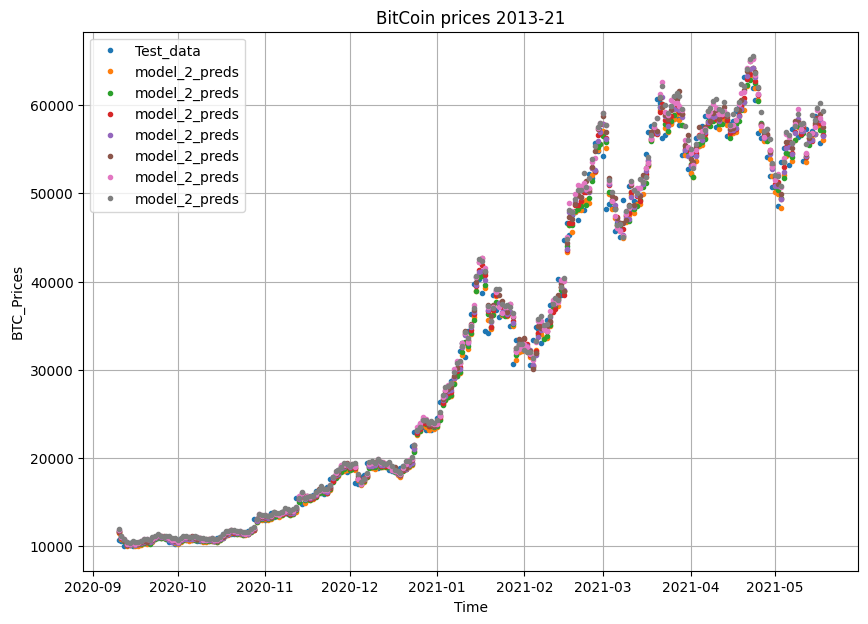

In [71]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_2_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, label="model_2_preds")


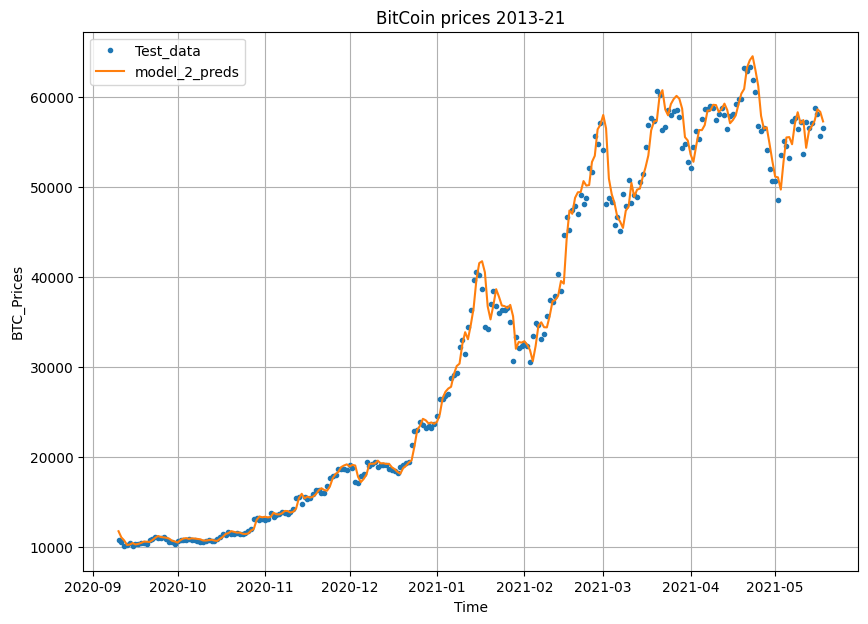

In [72]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_2_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_2_preds, axis=1),
                 format="-",
                 start=offset,
                 label="model_2_preds")

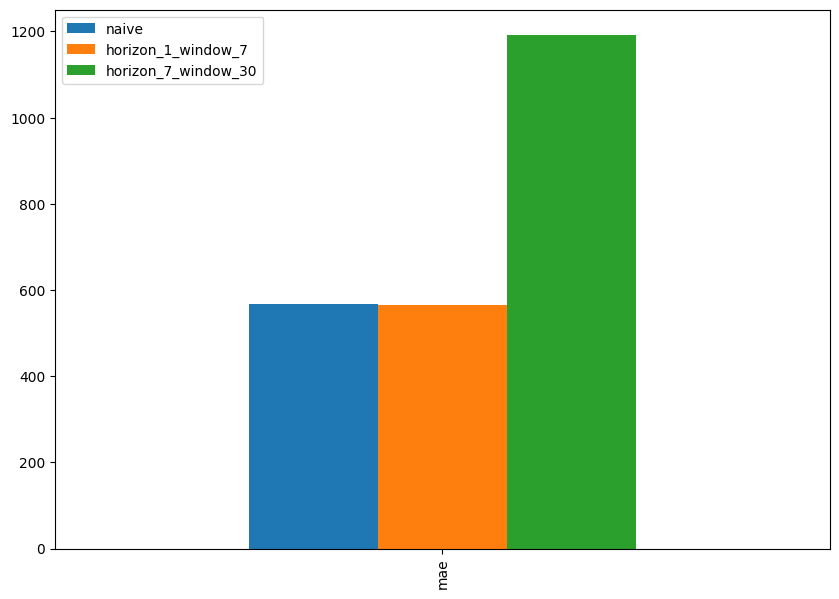

In [73]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              #"horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_2_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

Model_3: Conv1D

In [74]:
HORIZON =1
WINDOWS=7

In [75]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

window_steps: [[0 1 2 3 4 5 6 7]]
window indexes: [[0 1 2 3 4 5 6 7]
 [1 2 3 4 5 6 7 8]
 [2 3 4 5 6 7 8 9]]


(2780, 2780)

In [83]:
# Create train/test splits
train_windows,  train_labels,test_windows, test_labels = make_train_test_spilts(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [77]:
# Check data sample shapes
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [78]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [84]:
# Model_3_conv1D
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, padding='causal', activation='relu'),
    layers.Dense(HORIZON)
], name='model_3')

model_3.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

history_3 = model_3.fit(train_windows,
                        train_labels,
                        epochs=100,
                        batch_size=128,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name='model_3')])

Epoch 1/100
 1/18 [>.............................] - ETA: 8s - loss: 2976.5913 - mae: 2976.5913

18/18 [==============================] - 1s 44ms/step - loss: 1195.0554 - mae: 1195.0554 - val_loss: 2184.9429 - val_mae: 2184.9429
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 334.3069 - mae: 334.3069

18/18 [==============================] - 1s 33ms/step - loss: 302.4122 - mae: 302.4122 - val_loss: 1466.2799 - val_mae: 1466.2799
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 193.1059 - mae: 193.1059

18/18 [==============================] - 1s 33ms/step - loss: 194.6211 - mae: 194.6211 - val_loss: 1180.6702 - val_mae: 1180.6702
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 235.4240 - mae: 235.4240

18/18 [==============================] - 1s 34ms/step - loss: 181.2201 - mae: 181.2201 - val_loss: 1021.9201 - val_mae: 1021.9202
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 176.9501 - mae: 176.9501

18/18 [==============================] - 1s 34ms/step - loss: 178.1268 - mae: 178.1268 - val_loss: 1011.1338 - val_mae: 1011.1338
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 133.7871 - mae: 133.7871

18/18 [==============================] - 1s 52ms/step - loss: 177.3281 - mae: 177.3281 - val_loss: 986.4757 - val_mae: 986.4757
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 220.5072 - mae: 220.5072

18/18 [==============================] - 1s 34ms/step - loss: 173.9986 - mae: 173.9986 - val_loss: 968.6950 - val_mae: 968.6950
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 147.5430 - mae: 147.5430

18/18 [==============================] - 1s 33ms/step - loss: 170.6659 - mae: 170.6659 - val_loss: 951.1178 - val_mae: 951.1178
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 169.1617 - mae: 169.1617 - val_loss: 968.4558 - val_mae: 968.4558
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 182.5114 - mae: 182.5114

18/18 [==============================] - 1s 33ms/step - loss: 166.0086 - mae: 166.0086 - val_loss: 918.8668 - val_mae: 918.8668
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 179.7768 - mae: 179.7768

18/18 [==============================] - 1s 33ms/step - loss: 163.2117 - mae: 163.2117 - val_loss: 900.9267 - val_mae: 900.9267
Epoch 12/100
18/18 [==============================] - 0s 3ms/step - loss: 160.9241 - mae: 160.9241 - val_loss: 959.3989 - val_mae: 959.3989
Epoch 13/100
18/18 [==============================] - 0s 3ms/step - loss: 159.8016 - mae: 159.8016 - val_loss: 906.5981 - val_mae: 906.5980
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 170.6436 - mae: 170.6436

18/18 [==============================] - 1s 35ms/step - loss: 156.5701 - mae: 156.5701 - val_loss: 889.8941 - val_mae: 889.8941
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 159.7046 - mae: 159.7046

18/18 [==============================] - 1s 34ms/step - loss: 153.8768 - mae: 153.8768 - val_loss: 861.6334 - val_mae: 861.6334
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 139.5395 - mae: 139.5395

18/18 [==============================] - 1s 33ms/step - loss: 150.4292 - mae: 150.4292 - val_loss: 837.2544 - val_mae: 837.2544
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 144.1942 - mae: 144.1942

18/18 [==============================] - 1s 33ms/step - loss: 150.4218 - mae: 150.4218 - val_loss: 819.9645 - val_mae: 819.9645
Epoch 18/100
18/18 [==============================] - 0s 4ms/step - loss: 146.3481 - mae: 146.3481 - val_loss: 823.7060 - val_mae: 823.7060
Epoch 19/100
18/18 [==============================] - 0s 4ms/step - loss: 142.9375 - mae: 142.9375 - val_loss: 826.8383 - val_mae: 826.8383
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 155.6597 - mae: 155.6597

18/18 [==============================] - 1s 45ms/step - loss: 143.9887 - mae: 143.9887 - val_loss: 788.7073 - val_mae: 788.7073
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 191.2348 - mae: 191.2348

18/18 [==============================] - 1s 45ms/step - loss: 142.1174 - mae: 142.1174 - val_loss: 765.6227 - val_mae: 765.6227
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 188.2212 - mae: 188.2212

18/18 [==============================] - 1s 35ms/step - loss: 139.0093 - mae: 139.0093 - val_loss: 757.2166 - val_mae: 757.2166
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 146.7946 - mae: 146.7946

18/18 [==============================] - 1s 35ms/step - loss: 135.4202 - mae: 135.4202 - val_loss: 746.9835 - val_mae: 746.9835
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 150.2204 - mae: 150.2204

18/18 [==============================] - 1s 57ms/step - loss: 136.1204 - mae: 136.1204 - val_loss: 737.2711 - val_mae: 737.2711
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 138.5031 - mae: 138.5031

18/18 [==============================] - 1s 34ms/step - loss: 134.7126 - mae: 134.7126 - val_loss: 725.0226 - val_mae: 725.0226
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 137.7511 - mae: 137.7511

18/18 [==============================] - 1s 34ms/step - loss: 131.5564 - mae: 131.5564 - val_loss: 716.2424 - val_mae: 716.2424
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 187.5699 - mae: 187.5699

18/18 [==============================] - 1s 34ms/step - loss: 129.7544 - mae: 129.7544 - val_loss: 706.5562 - val_mae: 706.5562
Epoch 28/100
18/18 [==============================] - 0s 3ms/step - loss: 127.6923 - mae: 127.6923 - val_loss: 710.8420 - val_mae: 710.8420
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 121.1337 - mae: 121.1337

18/18 [==============================] - 1s 34ms/step - loss: 126.3540 - mae: 126.3540 - val_loss: 701.5203 - val_mae: 701.5203
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 146.1022 - mae: 146.1022

18/18 [==============================] - 1s 34ms/step - loss: 130.9475 - mae: 130.9475 - val_loss: 690.2380 - val_mae: 690.2380
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 139.2154 - mae: 139.2154

18/18 [==============================] - 1s 32ms/step - loss: 124.7937 - mae: 124.7937 - val_loss: 685.9374 - val_mae: 685.9374
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 111.8565 - mae: 111.8565

18/18 [==============================] - 1s 34ms/step - loss: 123.1645 - mae: 123.1645 - val_loss: 679.2825 - val_mae: 679.2825
Epoch 33/100
18/18 [==============================] - 0s 3ms/step - loss: 123.3691 - mae: 123.3691 - val_loss: 729.6785 - val_mae: 729.6785
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 150.8112 - mae: 150.8112

18/18 [==============================] - 1s 33ms/step - loss: 126.5927 - mae: 126.5927 - val_loss: 669.4665 - val_mae: 669.4665
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 105.8553 - mae: 105.8553

18/18 [==============================] - 1s 33ms/step - loss: 122.1788 - mae: 122.1788 - val_loss: 650.2914 - val_mae: 650.2914
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 164.0808 - mae: 164.0808

18/18 [==============================] - 1s 35ms/step - loss: 122.2906 - mae: 122.2906 - val_loss: 646.1557 - val_mae: 646.1557
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 147.9236 - mae: 147.9236

18/18 [==============================] - 1s 33ms/step - loss: 120.4163 - mae: 120.4163 - val_loss: 643.4481 - val_mae: 643.4481
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 109.3005 - mae: 109.3005

18/18 [==============================] - 1s 34ms/step - loss: 120.8096 - mae: 120.8096 - val_loss: 641.4543 - val_mae: 641.4543
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 134.1404 - mae: 134.1404

18/18 [==============================] - 1s 58ms/step - loss: 118.6239 - mae: 118.6239 - val_loss: 634.2275 - val_mae: 634.2275
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 109.2322 - mae: 109.2322

18/18 [==============================] - 1s 44ms/step - loss: 118.3452 - mae: 118.3452 - val_loss: 630.2025 - val_mae: 630.2025
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 118.6160 - mae: 118.6160 - val_loss: 652.7746 - val_mae: 652.7746
Epoch 42/100
18/18 [==============================] - 0s 4ms/step - loss: 121.2550 - mae: 121.2550 - val_loss: 649.2914 - val_mae: 649.2914
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 118.3940 - mae: 118.3940 - val_loss: 638.3815 - val_mae: 638.3815
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 70.9647 - mae: 70.9647

18/18 [==============================] - 1s 41ms/step - loss: 118.1025 - mae: 118.1025 - val_loss: 620.3320 - val_mae: 620.3320
Epoch 45/100
18/18 [==============================] - 0s 3ms/step - loss: 115.6123 - mae: 115.6123 - val_loss: 637.0731 - val_mae: 637.0731
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 97.0183 - mae: 97.0183

18/18 [==============================] - 1s 32ms/step - loss: 117.8900 - mae: 117.8900 - val_loss: 620.0781 - val_mae: 620.0781
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 117.1357 - mae: 117.1357 - val_loss: 707.2368 - val_mae: 707.2368
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 116.0367 - mae: 116.0367 - val_loss: 625.0187 - val_mae: 625.0187
Epoch 49/100
18/18 [==============================] - 0s 3ms/step - loss: 115.7575 - mae: 115.7575 - val_loss: 640.2333 - val_mae: 640.2333
Epoch 50/100
18/18 [==============================] - 0s 3ms/step - loss: 119.6837 - mae: 119.6837 - val_loss: 652.4330 - val_mae: 652.4330
Epoch 51/100
 1/18 [>.............................] - ETA: 0s - loss: 101.7017 - mae: 101.7017

18/18 [==============================] - 2s 96ms/step - loss: 115.0736 - mae: 115.0736 - val_loss: 609.2588 - val_mae: 609.2588
Epoch 52/100
18/18 [==============================] - 0s 4ms/step - loss: 114.9267 - mae: 114.9267 - val_loss: 629.4344 - val_mae: 629.4344
Epoch 53/100
18/18 [==============================] - 0s 4ms/step - loss: 118.4940 - mae: 118.4940 - val_loss: 623.8462 - val_mae: 623.8462
Epoch 54/100
18/18 [==============================] - 0s 3ms/step - loss: 119.4199 - mae: 119.4199 - val_loss: 672.8009 - val_mae: 672.8009
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 140.7993 - mae: 140.7993

18/18 [==============================] - 1s 33ms/step - loss: 116.8410 - mae: 116.8410 - val_loss: 597.9827 - val_mae: 597.9827
Epoch 56/100
18/18 [==============================] - 0s 4ms/step - loss: 112.4790 - mae: 112.4790 - val_loss: 801.0543 - val_mae: 801.0543
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 134.0677 - mae: 134.0677 - val_loss: 759.8036 - val_mae: 759.8036
Epoch 58/100
18/18 [==============================] - 0s 3ms/step - loss: 127.6919 - mae: 127.6919 - val_loss: 662.9127 - val_mae: 662.9127
Epoch 59/100
 1/18 [>.............................] - ETA: 0s - loss: 82.4681 - mae: 82.4681

18/18 [==============================] - 1s 33ms/step - loss: 112.3608 - mae: 112.3608 - val_loss: 595.6736 - val_mae: 595.6736
Epoch 60/100
18/18 [==============================] - 0s 3ms/step - loss: 112.2330 - mae: 112.2330 - val_loss: 601.5563 - val_mae: 601.5563
Epoch 61/100
 1/18 [>.............................] - ETA: 0s - loss: 134.3097 - mae: 134.3097

18/18 [==============================] - 1s 33ms/step - loss: 111.4485 - mae: 111.4485 - val_loss: 594.6280 - val_mae: 594.6280
Epoch 62/100
18/18 [==============================] - 0s 3ms/step - loss: 110.6402 - mae: 110.6402 - val_loss: 604.8268 - val_mae: 604.8268
Epoch 63/100
 1/18 [>.............................] - ETA: 0s - loss: 97.9877 - mae: 97.9877

18/18 [==============================] - 1s 34ms/step - loss: 112.4614 - mae: 112.4614 - val_loss: 589.8349 - val_mae: 589.8349
Epoch 64/100
18/18 [==============================] - 0s 3ms/step - loss: 112.1253 - mae: 112.1253 - val_loss: 667.6672 - val_mae: 667.6672
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 142.0477 - mae: 142.0477

18/18 [==============================] - 1s 35ms/step - loss: 116.6380 - mae: 116.6380 - val_loss: 586.2438 - val_mae: 586.2438
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 117.1725 - mae: 117.1725

18/18 [==============================] - 1s 34ms/step - loss: 112.3874 - mae: 112.3874 - val_loss: 584.6281 - val_mae: 584.6281
Epoch 67/100
18/18 [==============================] - 0s 3ms/step - loss: 109.5276 - mae: 109.5276 - val_loss: 656.2600 - val_mae: 656.2600
Epoch 68/100
18/18 [==============================] - 0s 3ms/step - loss: 113.5591 - mae: 113.5591 - val_loss: 696.0768 - val_mae: 696.0768
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 124.7948 - mae: 124.7948 - val_loss: 623.9800 - val_mae: 623.9800
Epoch 70/100
18/18 [==============================] - 0s 3ms/step - loss: 127.8862 - mae: 127.8862 - val_loss: 600.1103 - val_mae: 600.1103
Epoch 71/100
18/18 [==============================] - 0s 3ms/step - loss: 114.1490 - mae: 114.1490 - val_loss: 615.2092 - val_mae: 615.2092
Epoch 72/100
18/18 [==============================] - 0s 3ms/step - loss: 111.8203 - mae: 111.8203 - val_loss: 589.4457 - val_mae: 589.4457
Epoch 73/100
18/18 [============

18/18 [==============================] - 1s 36ms/step - loss: 110.2500 - mae: 110.2500 - val_loss: 580.7965 - val_mae: 580.7965
Epoch 75/100
18/18 [==============================] - 0s 3ms/step - loss: 110.1644 - mae: 110.1644 - val_loss: 592.7116 - val_mae: 592.7116
Epoch 76/100
18/18 [==============================] - 0s 4ms/step - loss: 111.2910 - mae: 111.2910 - val_loss: 593.4406 - val_mae: 593.4406
Epoch 77/100
18/18 [==============================] - 0s 3ms/step - loss: 110.4651 - mae: 110.4651 - val_loss: 582.3368 - val_mae: 582.3368
Epoch 78/100
18/18 [==============================] - 0s 3ms/step - loss: 111.4252 - mae: 111.4252 - val_loss: 581.9276 - val_mae: 581.9276
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 110.6188 - mae: 110.6188 - val_loss: 605.6313 - val_mae: 605.6313
Epoch 80/100
 1/18 [>.............................] - ETA: 0s - loss: 119.4032 - mae: 119.4032

18/18 [==============================] - 1s 33ms/step - loss: 110.5148 - mae: 110.5148 - val_loss: 576.6915 - val_mae: 576.6915
Epoch 81/100
 1/18 [>.............................] - ETA: 0s - loss: 94.6260 - mae: 94.6260

18/18 [==============================] - 1s 57ms/step - loss: 108.2966 - mae: 108.2966 - val_loss: 576.5103 - val_mae: 576.5103
Epoch 82/100
 1/18 [>.............................] - ETA: 0s - loss: 199.9608 - mae: 199.9608

18/18 [==============================] - 1s 42ms/step - loss: 116.1773 - mae: 116.1773 - val_loss: 575.5697 - val_mae: 575.5697
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss: 113.3168 - mae: 113.3168 - val_loss: 696.9874 - val_mae: 696.9874
Epoch 84/100
18/18 [==============================] - 0s 3ms/step - loss: 116.7119 - mae: 116.7119 - val_loss: 575.5906 - val_mae: 575.5906
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6339 - mae: 108.6339 - val_loss: 584.1214 - val_mae: 584.1214
Epoch 86/100
18/18 [==============================] - 0s 4ms/step - loss: 110.8903 - mae: 110.8903 - val_loss: 642.0787 - val_mae: 642.0787
Epoch 87/100
18/18 [==============================] - 0s 4ms/step - loss: 109.0878 - mae: 109.0878 - val_loss: 590.7607 - val_mae: 590.7607
Epoch 88/100
18/18 [==============================] - 0s 4ms/step - loss: 110.2595 - mae: 110.2595 - val_loss: 615.4230 - val_mae: 615.4230
Epoch 89/100
 1/18 [>...........

18/18 [==============================] - 1s 45ms/step - loss: 110.6252 - mae: 110.6252 - val_loss: 572.5480 - val_mae: 572.5480
Epoch 90/100
18/18 [==============================] - 0s 3ms/step - loss: 108.4638 - mae: 108.4638 - val_loss: 643.0545 - val_mae: 643.0545
Epoch 91/100
18/18 [==============================] - 0s 3ms/step - loss: 114.2788 - mae: 114.2788 - val_loss: 620.1514 - val_mae: 620.1514
Epoch 92/100
18/18 [==============================] - 0s 3ms/step - loss: 110.8604 - mae: 110.8604 - val_loss: 573.0485 - val_mae: 573.0485
Epoch 93/100
18/18 [==============================] - 0s 4ms/step - loss: 113.8768 - mae: 113.8768 - val_loss: 621.6743 - val_mae: 621.6743
Epoch 94/100
18/18 [==============================] - 0s 3ms/step - loss: 111.2532 - mae: 111.2532 - val_loss: 581.3201 - val_mae: 581.3201
Epoch 95/100
 1/18 [>.............................] - ETA: 0s - loss: 137.1509 - mae: 137.1509

18/18 [==============================] - 1s 34ms/step - loss: 107.6969 - mae: 107.6969 - val_loss: 570.8433 - val_mae: 570.8433
Epoch 96/100
18/18 [==============================] - 0s 3ms/step - loss: 116.1831 - mae: 116.1831 - val_loss: 619.5696 - val_mae: 619.5696
Epoch 97/100
18/18 [==============================] - 0s 4ms/step - loss: 110.5666 - mae: 110.5666 - val_loss: 579.2667 - val_mae: 579.2667
Epoch 98/100
18/18 [==============================] - 0s 3ms/step - loss: 109.0836 - mae: 109.0836 - val_loss: 571.7175 - val_mae: 571.7175
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 152.8185 - mae: 152.8185

18/18 [==============================] - 1s 34ms/step - loss: 108.5083 - mae: 108.5083 - val_loss: 569.3868 - val_mae: 569.3868
Epoch 100/100
18/18 [==============================] - 0s 4ms/step - loss: 110.1200 - mae: 110.1200 - val_loss: 617.3351 - val_mae: 617.3351


In [85]:
# Load in best performing Conv1D model and evaluate it on the test data
model_3 = tf.keras.models.load_model("model_experiments/model_3")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 569.3868 - mae: 569.3868


[569.3868408203125, 569.3868408203125]

In [87]:
# Make predictions
model_3_preds = make_preds(model_3, test_windows)
model_3_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8907.0625, 8801.767 , 9017.538 , 8810.165 , 8769.111 , 8759.207 ,
       8694.81  , 8549.017 , 8486.157 , 8531.802 ], dtype=float32)>

In [88]:
# Evaluate predictions
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 569.38684,
 'mse': 1181501.9,
 'rmse': 1086.9691,
 'mape': 2.548908,
 'mase': 1.000255}

model_4: RNN(LSTM)

In [89]:
# model_4_lstm
tf.random.set_seed(42)

# Build with Functional API
inputs = layers.Input(shape=(WINDOWS))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(128, activation='relu')(x)
outputs = layers.Dense(HORIZON)(x)
model_4 = tf.keras.Model(inputs, outputs, name='model_4')


model_4.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

model_4.fit(train_windows,
            train_labels,
            epochs=100,
            validation_data=(test_windows, test_labels),
            batch_size=100,
            callbacks=[create_model_checkpoint(model_name='model_4')])

Epoch 1/100
17/23 [=====================>........] - ETA: 0s - loss: 2660.6299 - mae: 2660.6299 

23/23 [==============================] - 4s 78ms/step - loss: 2468.3953 - mae: 2468.3953 - val_loss: 9604.3418 - val_mae: 9604.3418
Epoch 2/100
16/23 [===================>..........] - ETA: 0s - loss: 759.5857 - mae: 759.5857  

23/23 [==============================] - 2s 70ms/step - loss: 629.1748 - mae: 629.1748 - val_loss: 2019.7775 - val_mae: 2019.7775
Epoch 3/100
16/23 [===================>..........] - ETA: 0s - loss: 270.2141 - mae: 270.2141

23/23 [==============================] - 2s 68ms/step - loss: 256.3420 - mae: 256.3420 - val_loss: 1233.2212 - val_mae: 1233.2212
Epoch 4/100
18/23 [======================>.......] - ETA: 0s - loss: 222.1472 - mae: 222.1472

23/23 [==============================] - 2s 78ms/step - loss: 215.7833 - mae: 215.7833 - val_loss: 1185.2142 - val_mae: 1185.2142
Epoch 5/100
22/23 [===========================>..] - ETA: 0s - loss: 210.2046 - mae: 210.2046

23/23 [==============================] - 2s 98ms/step - loss: 209.6235 - mae: 209.6235 - val_loss: 1171.9027 - val_mae: 1171.9027
Epoch 6/100
15/23 [==================>...........] - ETA: 0s - loss: 207.9462 - mae: 207.9462

23/23 [==============================] - 1s 67ms/step - loss: 211.3090 - mae: 211.3090 - val_loss: 1166.3446 - val_mae: 1166.3446
Epoch 7/100
14/23 [=================>............] - ETA: 0s - loss: 222.9432 - mae: 222.9432

23/23 [==============================] - 2s 69ms/step - loss: 209.0442 - mae: 209.0442 - val_loss: 1144.3649 - val_mae: 1144.3649
Epoch 8/100
23/23 [==============================] - 0s 5ms/step - loss: 203.3792 - mae: 203.3792 - val_loss: 1163.9609 - val_mae: 1163.9609
Epoch 9/100
23/23 [==============================] - 0s 5ms/step - loss: 201.0338 - mae: 201.0338 - val_loss: 1144.5197 - val_mae: 1144.5197
Epoch 10/100
17/23 [=====================>........] - ETA: 0s - loss: 196.8340 - mae: 196.8340

23/23 [==============================] - 1s 68ms/step - loss: 199.9987 - mae: 199.9987 - val_loss: 1112.3141 - val_mae: 1112.3141
Epoch 11/100
17/23 [=====================>........] - ETA: 0s - loss: 201.4222 - mae: 201.4222

23/23 [==============================] - 2s 69ms/step - loss: 196.7378 - mae: 196.7378 - val_loss: 1092.6115 - val_mae: 1092.6115
Epoch 12/100
23/23 [==============================] - 0s 4ms/step - loss: 194.8227 - mae: 194.8227 - val_loss: 1139.8071 - val_mae: 1139.8071
Epoch 13/100
18/23 [======================>.......] - ETA: 0s - loss: 193.7999 - mae: 193.7999

23/23 [==============================] - 2s 91ms/step - loss: 192.8763 - mae: 192.8763 - val_loss: 1085.0825 - val_mae: 1085.0825
Epoch 14/100
23/23 [==============================] - 0s 5ms/step - loss: 189.5908 - mae: 189.5908 - val_loss: 1115.8066 - val_mae: 1115.8066
Epoch 15/100
16/23 [===================>..........] - ETA: 0s - loss: 183.7104 - mae: 183.7104

23/23 [==============================] - 2s 88ms/step - loss: 188.5294 - mae: 188.5294 - val_loss: 1075.5004 - val_mae: 1075.5004
Epoch 16/100
18/23 [======================>.......] - ETA: 0s - loss: 184.2136 - mae: 184.2136

23/23 [==============================] - 2s 69ms/step - loss: 184.3503 - mae: 184.3503 - val_loss: 1041.5242 - val_mae: 1041.5242
Epoch 17/100
23/23 [==============================] - 0s 5ms/step - loss: 182.8229 - mae: 182.8229 - val_loss: 1117.6245 - val_mae: 1117.6245
Epoch 18/100
15/23 [==================>...........] - ETA: 0s - loss: 192.0895 - mae: 192.0895

23/23 [==============================] - 2s 70ms/step - loss: 182.3353 - mae: 182.3353 - val_loss: 1040.3413 - val_mae: 1040.3413
Epoch 19/100
16/23 [===================>..........] - ETA: 0s - loss: 184.7714 - mae: 184.7714

23/23 [==============================] - 2s 70ms/step - loss: 178.8155 - mae: 178.8155 - val_loss: 1016.6573 - val_mae: 1016.6573
Epoch 20/100
17/23 [=====================>........] - ETA: 0s - loss: 180.6124 - mae: 180.6124

23/23 [==============================] - 2s 91ms/step - loss: 175.4512 - mae: 175.4512 - val_loss: 973.9287 - val_mae: 973.9287
Epoch 21/100
23/23 [==============================] - 0s 5ms/step - loss: 173.3690 - mae: 173.3690 - val_loss: 978.1956 - val_mae: 978.1956
Epoch 22/100
23/23 [==============================] - 0s 5ms/step - loss: 170.8698 - mae: 170.8698 - val_loss: 996.2391 - val_mae: 996.2391
Epoch 23/100
17/23 [=====================>........] - ETA: 0s - loss: 164.8305 - mae: 164.8305

23/23 [==============================] - 2s 70ms/step - loss: 168.9677 - mae: 168.9677 - val_loss: 971.2674 - val_mae: 971.2675
Epoch 24/100
15/23 [==================>...........] - ETA: 0s - loss: 161.2075 - mae: 161.2075

23/23 [==============================] - 2s 72ms/step - loss: 165.5665 - mae: 165.5665 - val_loss: 945.1370 - val_mae: 945.1370
Epoch 25/100
23/23 [==============================] - 0s 8ms/step - loss: 163.3834 - mae: 163.3834 - val_loss: 950.3989 - val_mae: 950.3989
Epoch 26/100
23/23 [==============================] - ETA: 0s - loss: 160.6246 - mae: 160.6246

23/23 [==============================] - 2s 83ms/step - loss: 160.6246 - mae: 160.6246 - val_loss: 890.5960 - val_mae: 890.5959
Epoch 27/100
23/23 [==============================] - 0s 5ms/step - loss: 158.6318 - mae: 158.6318 - val_loss: 921.2766 - val_mae: 921.2766
Epoch 28/100
17/23 [=====================>........] - ETA: 0s - loss: 152.7076 - mae: 152.7076

23/23 [==============================] - 2s 94ms/step - loss: 155.7005 - mae: 155.7005 - val_loss: 869.8829 - val_mae: 869.8829
Epoch 29/100
14/23 [=================>............] - ETA: 0s - loss: 157.6253 - mae: 157.6253

23/23 [==============================] - 2s 69ms/step - loss: 156.2857 - mae: 156.2857 - val_loss: 848.4113 - val_mae: 848.4113
Epoch 30/100
23/23 [==============================] - 0s 5ms/step - loss: 155.2473 - mae: 155.2473 - val_loss: 959.1271 - val_mae: 959.1273
Epoch 31/100
23/23 [==============================] - 0s 5ms/step - loss: 151.9258 - mae: 151.9258 - val_loss: 848.6058 - val_mae: 848.6058
Epoch 32/100
16/23 [===================>..........] - ETA: 0s - loss: 147.8023 - mae: 147.8023

23/23 [==============================] - 2s 69ms/step - loss: 146.2138 - mae: 146.2138 - val_loss: 809.8389 - val_mae: 809.8389
Epoch 33/100
23/23 [==============================] - 0s 5ms/step - loss: 145.7360 - mae: 145.7360 - val_loss: 816.7712 - val_mae: 816.7712
Epoch 34/100
23/23 [==============================] - 0s 4ms/step - loss: 143.1737 - mae: 143.1737 - val_loss: 832.2333 - val_mae: 832.2333
Epoch 35/100
18/23 [======================>.......] - ETA: 0s - loss: 144.5964 - mae: 144.5964

23/23 [==============================] - 2s 69ms/step - loss: 143.0650 - mae: 143.0650 - val_loss: 804.5287 - val_mae: 804.5287
Epoch 36/100
14/23 [=================>............] - ETA: 0s - loss: 141.2740 - mae: 141.2740

23/23 [==============================] - 2s 69ms/step - loss: 142.7213 - mae: 142.7213 - val_loss: 791.9573 - val_mae: 791.9573
Epoch 37/100
18/23 [======================>.......] - ETA: 0s - loss: 139.6550 - mae: 139.6550

23/23 [==============================] - 2s 111ms/step - loss: 137.9534 - mae: 137.9534 - val_loss: 760.5610 - val_mae: 760.5610
Epoch 38/100
14/23 [=================>............] - ETA: 0s - loss: 145.5149 - mae: 145.5149

23/23 [==============================] - 1s 67ms/step - loss: 135.8577 - mae: 135.8577 - val_loss: 748.8419 - val_mae: 748.8419
Epoch 39/100
23/23 [==============================] - 0s 5ms/step - loss: 134.8591 - mae: 134.8591 - val_loss: 768.8530 - val_mae: 768.8530
Epoch 40/100
17/23 [=====================>........] - ETA: 0s - loss: 134.4568 - mae: 134.4568

23/23 [==============================] - 1s 67ms/step - loss: 132.1065 - mae: 132.1065 - val_loss: 730.5613 - val_mae: 730.5613
Epoch 41/100
18/23 [======================>.......] - ETA: 0s - loss: 134.3591 - mae: 134.3591

23/23 [==============================] - 2s 69ms/step - loss: 130.1485 - mae: 130.1485 - val_loss: 718.4840 - val_mae: 718.4840
Epoch 42/100
23/23 [==============================] - 0s 5ms/step - loss: 130.5892 - mae: 130.5892 - val_loss: 724.2503 - val_mae: 724.2503
Epoch 43/100
14/23 [=================>............] - ETA: 0s - loss: 124.4483 - mae: 124.4483

23/23 [==============================] - 1s 68ms/step - loss: 130.4258 - mae: 130.4258 - val_loss: 702.2463 - val_mae: 702.2463
Epoch 44/100
16/23 [===================>..........] - ETA: 0s - loss: 125.7057 - mae: 125.7057

23/23 [==============================] - 2s 95ms/step - loss: 126.8277 - mae: 126.8277 - val_loss: 702.0569 - val_mae: 702.0569
Epoch 45/100
14/23 [=================>............] - ETA: 0s - loss: 125.4901 - mae: 125.4901

23/23 [==============================] - 2s 74ms/step - loss: 125.7008 - mae: 125.7008 - val_loss: 687.5297 - val_mae: 687.5297
Epoch 46/100
22/23 [===========================>..] - ETA: 0s - loss: 126.6324 - mae: 126.6324

23/23 [==============================] - 2s 83ms/step - loss: 127.1153 - mae: 127.1153 - val_loss: 680.3385 - val_mae: 680.3385
Epoch 47/100
23/23 [==============================] - 0s 5ms/step - loss: 124.0227 - mae: 124.0227 - val_loss: 727.7092 - val_mae: 727.7092
Epoch 48/100
23/23 [==============================] - 0s 5ms/step - loss: 123.1852 - mae: 123.1852 - val_loss: 713.7580 - val_mae: 713.7580
Epoch 49/100
23/23 [==============================] - 0s 5ms/step - loss: 123.4283 - mae: 123.4283 - val_loss: 685.1346 - val_mae: 685.1346
Epoch 50/100
23/23 [==============================] - 0s 5ms/step - loss: 124.4875 - mae: 124.4875 - val_loss: 681.6984 - val_mae: 681.6984
Epoch 51/100
23/23 [==============================] - 0s 5ms/step - loss: 121.3696 - mae: 121.3696 - val_loss: 686.2971 - val_mae: 686.2971
Epoch 52/100
17/23 [=====================>........] - ETA: 0s - loss: 126.9858 - mae: 126.9858

23/23 [==============================] - 1s 67ms/step - loss: 120.0229 - mae: 120.0229 - val_loss: 660.4057 - val_mae: 660.4057
Epoch 53/100
18/23 [======================>.......] - ETA: 0s - loss: 123.1625 - mae: 123.1625

23/23 [==============================] - 1s 67ms/step - loss: 122.3360 - mae: 122.3360 - val_loss: 646.1196 - val_mae: 646.1196
Epoch 54/100
23/23 [==============================] - 0s 5ms/step - loss: 119.0655 - mae: 119.0655 - val_loss: 678.3535 - val_mae: 678.3535
Epoch 55/100
17/23 [=====================>........] - ETA: 0s - loss: 127.2971 - mae: 127.2971

23/23 [==============================] - 2s 96ms/step - loss: 120.7639 - mae: 120.7639 - val_loss: 642.3140 - val_mae: 642.3140
Epoch 56/100
23/23 [==============================] - 0s 5ms/step - loss: 119.1911 - mae: 119.1911 - val_loss: 783.3714 - val_mae: 783.3714
Epoch 57/100
18/23 [======================>.......] - ETA: 0s - loss: 136.0976 - mae: 136.0976

23/23 [==============================] - 3s 114ms/step - loss: 133.5442 - mae: 133.5442 - val_loss: 638.2037 - val_mae: 638.2037
Epoch 58/100
16/23 [===================>..........] - ETA: 0s - loss: 119.2261 - mae: 119.2261

23/23 [==============================] - 2s 88ms/step - loss: 119.2031 - mae: 119.2031 - val_loss: 635.0264 - val_mae: 635.0264
Epoch 59/100
23/23 [==============================] - ETA: 0s - loss: 117.6880 - mae: 117.6880

23/23 [==============================] - 2s 78ms/step - loss: 117.6880 - mae: 117.6880 - val_loss: 633.6043 - val_mae: 633.6043
Epoch 60/100
23/23 [==============================] - 0s 5ms/step - loss: 115.2662 - mae: 115.2662 - val_loss: 642.6747 - val_mae: 642.6747
Epoch 61/100
23/23 [==============================] - 0s 5ms/step - loss: 118.5940 - mae: 118.5940 - val_loss: 647.0701 - val_mae: 647.0701
Epoch 62/100
16/23 [===================>..........] - ETA: 0s - loss: 114.3184 - mae: 114.3184

23/23 [==============================] - 2s 68ms/step - loss: 115.2237 - mae: 115.2237 - val_loss: 622.1754 - val_mae: 622.1754
Epoch 63/100
23/23 [==============================] - 0s 6ms/step - loss: 117.2564 - mae: 117.2564 - val_loss: 663.7432 - val_mae: 663.7432
Epoch 64/100
23/23 [==============================] - 0s 5ms/step - loss: 117.4078 - mae: 117.4078 - val_loss: 742.0529 - val_mae: 742.0529
Epoch 65/100
23/23 [==============================] - 0s 5ms/step - loss: 121.7639 - mae: 121.7639 - val_loss: 636.4833 - val_mae: 636.4833
Epoch 66/100
18/23 [======================>.......] - ETA: 0s - loss: 114.0664 - mae: 114.0664

23/23 [==============================] - 2s 91ms/step - loss: 114.3718 - mae: 114.3718 - val_loss: 615.4741 - val_mae: 615.4741
Epoch 67/100
23/23 [==============================] - 0s 5ms/step - loss: 114.1347 - mae: 114.1347 - val_loss: 663.7731 - val_mae: 663.7731
Epoch 68/100
23/23 [==============================] - 0s 6ms/step - loss: 118.5890 - mae: 118.5890 - val_loss: 660.1573 - val_mae: 660.1573
Epoch 69/100
23/23 [==============================] - 0s 5ms/step - loss: 124.2573 - mae: 124.2573 - val_loss: 675.3829 - val_mae: 675.3829
Epoch 70/100
17/23 [=====================>........] - ETA: 0s - loss: 120.0079 - mae: 120.0079

23/23 [==============================] - 2s 69ms/step - loss: 120.0347 - mae: 120.0347 - val_loss: 614.8792 - val_mae: 614.8792
Epoch 71/100
23/23 [==============================] - 0s 5ms/step - loss: 116.2636 - mae: 116.2636 - val_loss: 703.0444 - val_mae: 703.0444
Epoch 72/100
23/23 [==============================] - 0s 5ms/step - loss: 116.5914 - mae: 116.5914 - val_loss: 640.4216 - val_mae: 640.4216
Epoch 73/100
14/23 [=================>............] - ETA: 0s - loss: 114.6570 - mae: 114.6570

23/23 [==============================] - 2s 71ms/step - loss: 112.4874 - mae: 112.4874 - val_loss: 610.2292 - val_mae: 610.2292
Epoch 74/100
23/23 [==============================] - 0s 5ms/step - loss: 115.8042 - mae: 115.8042 - val_loss: 627.7404 - val_mae: 627.7404
Epoch 75/100
23/23 [==============================] - 0s 5ms/step - loss: 113.8303 - mae: 113.8303 - val_loss: 639.7213 - val_mae: 639.7213
Epoch 76/100
15/23 [==================>...........] - ETA: 0s - loss: 113.6299 - mae: 113.6299

23/23 [==============================] - 2s 78ms/step - loss: 113.9791 - mae: 113.9791 - val_loss: 605.6907 - val_mae: 605.6907
Epoch 77/100
17/23 [=====================>........] - ETA: 0s - loss: 116.6019 - mae: 116.6019

23/23 [==============================] - 2s 81ms/step - loss: 113.7722 - mae: 113.7722 - val_loss: 601.4210 - val_mae: 601.4210
Epoch 78/100
17/23 [=====================>........] - ETA: 0s - loss: 107.9660 - mae: 107.9660

23/23 [==============================] - 3s 140ms/step - loss: 112.0343 - mae: 112.0343 - val_loss: 600.6914 - val_mae: 600.6914
Epoch 79/100
23/23 [==============================] - 0s 5ms/step - loss: 112.5402 - mae: 112.5402 - val_loss: 605.5627 - val_mae: 605.5627
Epoch 80/100
23/23 [==============================] - 0s 12ms/step - loss: 111.4155 - mae: 111.4155 - val_loss: 602.5004 - val_mae: 602.5004
Epoch 81/100
19/23 [=======================>......] - ETA: 0s - loss: 113.0541 - mae: 113.0541

23/23 [==============================] - 2s 113ms/step - loss: 112.5602 - mae: 112.5602 - val_loss: 596.4678 - val_mae: 596.4678
Epoch 82/100
23/23 [==============================] - 0s 5ms/step - loss: 115.7152 - mae: 115.7152 - val_loss: 598.1023 - val_mae: 598.1023
Epoch 83/100
23/23 [==============================] - 0s 6ms/step - loss: 116.6132 - mae: 116.6132 - val_loss: 608.3391 - val_mae: 608.3391
Epoch 84/100
23/23 [==============================] - 0s 5ms/step - loss: 112.8488 - mae: 112.8488 - val_loss: 597.4913 - val_mae: 597.4913
Epoch 85/100
23/23 [==============================] - 0s 5ms/step - loss: 111.0469 - mae: 111.0469 - val_loss: 607.3150 - val_mae: 607.3150
Epoch 86/100
23/23 [==============================] - 0s 5ms/step - loss: 114.4280 - mae: 114.4280 - val_loss: 646.2474 - val_mae: 646.2474
Epoch 87/100
23/23 [==============================] - 0s 5ms/step - loss: 113.0405 - mae: 113.0405 - val_loss: 615.0730 - val_mae: 615.0730
Epoch 88/100
17/23 [===========

23/23 [==============================] - 2s 69ms/step - loss: 114.4052 - mae: 114.4052 - val_loss: 593.1992 - val_mae: 593.1992
Epoch 89/100
23/23 [==============================] - 0s 6ms/step - loss: 110.5722 - mae: 110.5722 - val_loss: 601.3572 - val_mae: 601.3572
Epoch 90/100
23/23 [==============================] - 0s 5ms/step - loss: 112.8328 - mae: 112.8328 - val_loss: 727.7444 - val_mae: 727.7443
Epoch 91/100
16/23 [===================>..........] - ETA: 0s - loss: 113.2809 - mae: 113.2809

23/23 [==============================] - 2s 86ms/step - loss: 113.5393 - mae: 113.5393 - val_loss: 591.2763 - val_mae: 591.2763
Epoch 92/100
19/23 [=======================>......] - ETA: 0s - loss: 111.9178 - mae: 111.9178

23/23 [==============================] - 2s 73ms/step - loss: 111.7424 - mae: 111.7424 - val_loss: 588.9152 - val_mae: 588.9152
Epoch 93/100
23/23 [==============================] - 0s 5ms/step - loss: 113.2134 - mae: 113.2134 - val_loss: 618.7922 - val_mae: 618.7922
Epoch 94/100
17/23 [=====================>........] - ETA: 0s - loss: 112.2412 - mae: 112.2412

23/23 [==============================] - 2s 96ms/step - loss: 112.1666 - mae: 112.1666 - val_loss: 588.1616 - val_mae: 588.1616
Epoch 95/100
23/23 [==============================] - 0s 6ms/step - loss: 113.3089 - mae: 113.3089 - val_loss: 591.5018 - val_mae: 591.5018
Epoch 96/100
23/23 [==============================] - 0s 5ms/step - loss: 113.4694 - mae: 113.4694 - val_loss: 588.3285 - val_mae: 588.3285
Epoch 97/100
23/23 [==============================] - 0s 5ms/step - loss: 109.8929 - mae: 109.8929 - val_loss: 593.1501 - val_mae: 593.1501
Epoch 98/100
16/23 [===================>..........] - ETA: 0s - loss: 110.6442 - mae: 110.6442

23/23 [==============================] - 2s 70ms/step - loss: 109.5216 - mae: 109.5216 - val_loss: 586.6217 - val_mae: 586.6217
Epoch 99/100
16/23 [===================>..........] - ETA: 0s - loss: 108.2107 - mae: 108.2107

23/23 [==============================] - 2s 70ms/step - loss: 110.9038 - mae: 110.9038 - val_loss: 584.6325 - val_mae: 584.6325
Epoch 100/100
23/23 [==============================] - 0s 4ms/step - loss: 110.9719 - mae: 110.9719 - val_loss: 661.7394 - val_mae: 661.7394


In [90]:
# Load in best version of model 5 and evaluate on the test data
model_4 = tf.keras.models.load_model("model_experiments/model_4/")
model_4.evaluate(test_windows, test_labels)


18/18 [==============================] - 0s 2ms/step - loss: 584.6325 - mae: 584.6325


[584.6325073242188, 584.6325073242188]

In [91]:
# Make predictions with our LSTM model
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8934.073, 8787.536, 8968.758, 8801.08 , 8727.025, 8733.34 ,
       8701.692, 8528.45 , 8464.156, 8508.758], dtype=float32)>

In [92]:
# Evaluate model 5 preds
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 584.6325,
 'mse': 1232975.2,
 'rmse': 1110.3942,
 'mape': 2.6289015,
 'mase': 1.0270374}